# Librerias

In [1]:
%config IPCompleter.greedy=True

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyodbc
import seaborn as sns
from pyodbc import ProgrammingError
from datetime import datetime

import cdx_pilotage.pims_functions as pf
pd.set_option('display.max_columns', None)
# pd.reset_option('display.max_columns')

# Carga datos Algeciras Cr1 y Cr3 LS por Familia

In [10]:
directorio_cdx = r'C:\Users\JESCOBARO\Desktop\CDX_PIMS'
nombre_csv_final = "df_merge_012021_092021.csv"
ruta = directorio_cdx + "\\" + nombre_csv_final

df = pd.read_csv(ruta) 

# display(df.dtypes)
# display(df.shape)
# display(df.head(3))

In [4]:
df_aux = pf.cases_uniques(df)

(2101, 6)

,Mes,Version,CaseID,Description,len,ordenar
0,01_January_2021,2020_11_03_V0,1,JAN21M3,7,2020-11-03
27574,01_January_2021,2020_11_10_V1,1,JAN21M3,7,2020-11-10
53526,01_January_2021,2020_11_17_V2,12,DEC20M3,7,2020-11-17
55160,01_January_2021,2020_11_17_V2,1,JAN21M3,7,2020-11-17
97644,01_January_2021,2020_11_24_V3,12,DEC20M3,7,2020-11-24
98461,01_January_2021,2020_11_24_V3,1,JAN21M3,7,2020-11-24
140128,01_January_2021,2020_12_01_V4,2,FEB21M3,7,2020-12-01
141774,01_January_2021,2020_12_01_V4,1,JAN21M3,7,2020-12-01
186126,02_February_2021,2020_11_01_V0,2,FEB21M3,7,2020-11-01
214455,02_February_2021,2020_11_01_V0,1,JAN21M3,7,2020-11-01


In [11]:
pd.set_option('display.max_columns', None)

# Filtros de casos
# df_algeciras = df[(df["Description"].str.len() == 7) & (df.Description != "Sin THD") & (df["CaseID"] != 81)]
df_algeciras = df.copy()

# print("CaseIDs uniques: ", len(df_algeciras["CaseID"].unique()), df_algeciras["CaseID"].unique())
# print("CaseIDs descriptions uniques: ", len(df_algeciras["Description"].unique()), df_algeciras["Description"].unique())

# Filtros:
refineria = ["A"]
submodels = ["SCD2", "SCDb"]
activity_limit = 0.2

df_algeciras = df_algeciras[df_algeciras["Refineria"].isin(refineria)]
df_algeciras = df_algeciras[df_algeciras["Submodel"].isin(submodels)]
df_algeciras = df_algeciras[df_algeciras["Activity"] > activity_limit]

print("Refinery: ", df_algeciras["Refineria"].unique())
print("Submodels: ", df_algeciras["Submodel"].unique())
print("Activity minimal: ", df_algeciras["Activity"].min())

display(df_algeciras.head(3))

Refinery:  ['A']
Submodels:  ['SCD2' 'SCDb']
Activity minimal:  0.2005531638860702


,Mes,Version,SolutionID,CaseID,ColumnName,Activity,Submodel,Crudo,Refineria,DateTime,ModelID,Solution_Case,Description,ObjectiveFunction,TotalTime,TAG,NAME,PIMS,Sin mermas,API,%S,BTM,Familia + IMO,country,region,% S FV 550+,% FV 550+
53,01_January_2021,2020_11_03_V0,657886895,1,SCD2AGBA,13.530938,SCD2,AGB,A,2020-11-05 10:26:05,5.0,657886895_1,JAN21M3,68653.039062,265,AGB,AGBAMI,AGB,AG0,48.277746,0.043,8.009575,Light Sweet IMO,Nigeria,West Africa,0.408575,2.426031
68,01_January_2021,2020_11_03_V0,657886895,1,SCD2BONA,9.134285,SCD2,BON,A,2020-11-05 10:26:05,5.0,657886895_1,JAN21M3,68653.039062,265,BON,BONGA,BON,BO0,27.700000,0.254,7.092782,High Density Sweet IMO,Nigeria,West Africa,0.657448,11.076281
70,01_January_2021,2020_11_03_V0,657886895,1,SCD2BUZA,12.959059,SCD2,BUZ,A,2020-11-05 10:26:05,5.0,657886895_1,JAN21M3,68653.039062,265,BUZ,BUZIOS,BUZ,BZ0,28.764706,0.280,7.140217,Heavy Sweet IMO,Brazil,South America,0.610520,26.603544


# Crudo 1 LS Agrupaciones

In [12]:
# Generar Pivot tables de los crudos sobre 'Familia + IMO'
df_origen = df_algeciras.copy()
submodel_cd1 =  "SCD2"
submodel_cd3 =  "SCDb"
agrupacion_imo = "Familia + IMO"
agrupacion_crudo = "Crudo"

# Pivot table crudo
table_cd1_crudo = pf.pivot_table_submodel_agrupacion(df_origen, submodel_cd1, agrupacion_crudo, print_returns=False)
table_cd1_crudo.head(3)

Crudo,Description,Version,CaseID,Submodel,ABO,AGB,AJE,AKP,AMB,ATA,AZE,BAU,BGA,BOL,BON,BUZ,CAE,CEP,CJB,E44,E46,EGI,ERH,ESC,ESH,FOR,GUL,IRA,JON,LIV,LOK,MEL,MRO,NKO,NOD,OBE,OKO,OKR,OKW,OTA,PEN,QAR,QUI,SAB,SAP,SKF,SUR,TIE,TIP,TRO,WML,WTC,WTL,YOH,ZAB,Month_order,Version_order
2087,SEP20M3(Nuevos Assays y SC Abiertos),2020_12_15_V2,901,SCD2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,2.445550,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,2020-09-01,2020-12-15
2088,SEP20M3(Nuevos Assays y SC Abiertos),2021_05_11_V1,903,SCD2,0.0,0.0,0.0,0.0,101.616798,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,49.549809,15.112857,0.0,0.0,0.0,0.0,0.0,0.0,89.910004,0.00000,0.0,0.0,2020-09-01,2021-05-11
1960,DEC20M3,2020_11_17_V2,12,SCD2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,129.987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.67939,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,26.44311,0.0,0.0,2020-12-01,2020-11-17


Shape inicial:  (2097, 58)


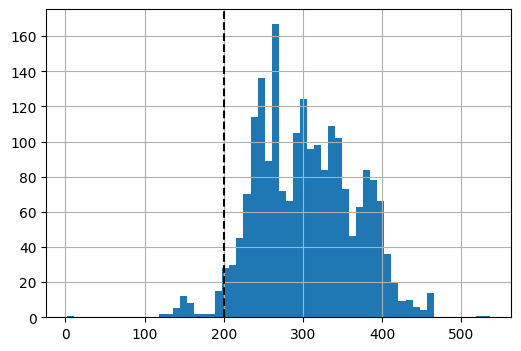

Shape final:  (2043, 58)


Crudo,Description,Version,CaseID,Submodel,ABO,AGB,AJE,AKP,AMB,ATA,AZE,BAU,BGA,BOL,BON,BUZ,CAE,CEP,CJB,E44,E46,EGI,ERH,ESC,ESH,FOR,GUL,IRA,JON,LIV,LOK,MEL,MRO,NKO,NOD,OBE,OKO,OKR,OKW,OTA,PEN,QAR,QUI,SAB,SAP,SKF,SUR,TIE,TIP,TRO,WML,WTC,WTL,YOH,ZAB,Month_order,Version_order,Total_activity
2088,SEP20M3(Nuevos Assays y SC Abiertos),2021_05_11_V1,903,SCD2,0.0,0.0,0.0,0.0,101.616798,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.910004,0.0,0.0,0.0,2020-09-01,2021-05-11,257.188467
1960,DEC20M3,2020_11_17_V2,12,SCD2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,129.987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.679390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,2020-12-01,2020-11-17,277.109499
1961,DEC20M3,2020_11_24_V3,12,SCD2,0.0,0.0,0.0,0.0,72.159950,0.0,0.0,0.0,129.987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122.302757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,2020-12-01,2020-11-24,324.449707


In [36]:
# Eliminar filas con un Total_activity minima y cambio valores menores a min_activity_crudo por 0
min_total_activity = 200
min_activity_crudo = 70

cols_crudos = table_cd1_crudo.select_dtypes('number').columns.tolist()
cols_crudos.remove("CaseID")
table_cd1_crudo_filter = table_cd1_crudo.copy()
table_cd1_crudo_filter["Total_activity"] = table_cd1_crudo_filter[cols_crudos].sum(axis=1)
print("Shape inicial: ", table_cd1_crudo_filter.shape)

# Buscar el corte gráficamente
table_cd1_crudo_filter.Total_activity.hist(bins = 60, figsize = (6, 4))
plt.axvline(x = min_total_activity, color='k', linestyle='--')
plt.show();

table_cd1_crudo_filter = table_cd1_crudo_filter[table_cd1_crudo_filter["Total_activity"] >= min_total_activity]

# Cambio valores menores a min_activity_crudo por 0
for col in cols_crudos:
    a = np.array(table_cd1_crudo_filter[col].values.tolist())
    table_cd1_crudo_filter[col] = np.where(a < min_activity_crudo, 0, a).tolist()
    
print("Shape final: ", table_cd1_crudo_filter.shape)
table_cd1_crudo_filter.head(3)

In [14]:
def col_to_bool(df, cols_crudos):
    list_bool_cols = []
    for col in cols_crudos:
        df[f'{col}_bool'] = df[col].apply(lambda x: 0 if x==0 else 1)
        list_bool_cols.append(f'{col}_bool')
    return df, list_bool_cols

In [20]:
def agrup_by_cols_combination(df, list_bool_cols, count="CaseID"):
    df_agrup = df.groupby(list_bool_cols)[count].agg(list).reset_index()
    df_agrup['num_versions'] = df_agrup[count].str.len()
    df_agrup.sort_values(by="num_versions", ascending=False, inplace = True)
    
    list_of_lists = []
    for row in range(df_agrup.shape[0]):
        lista = []
        for col in list_bool_cols:
            if df_agrup.iloc[row, df_agrup.columns.get_loc(col)] > 0:
                lista.append(col)
        lista = sorted(lista)
        list_to_append = []

        for l in lista:
            l_new = l.replace("_bool", "")
            list_to_append.append(l_new)
                               
        list_of_lists.append(list_to_append)
    
    df_agrup['Crudos_list'] = list_of_lists
    
    return df_agrup

In [37]:
df_bool, list_bool_cols = col_to_bool(table_cd1_crudo_filter, cols_crudos)
display(df_bool.head(3))
print(list_bool_cols)

Crudo,Description,Version,CaseID,Submodel,ABO,AGB,AJE,AKP,AMB,ATA,AZE,BAU,BGA,BOL,BON,BUZ,CAE,CEP,CJB,E44,E46,EGI,ERH,ESC,ESH,FOR,GUL,IRA,JON,LIV,LOK,MEL,MRO,NKO,NOD,OBE,OKO,OKR,OKW,OTA,PEN,QAR,QUI,SAB,SAP,SKF,SUR,TIE,TIP,TRO,WML,WTC,WTL,YOH,ZAB,Month_order,Version_order,Total_activity,ABO_bool,AGB_bool,AJE_bool,AKP_bool,AMB_bool,ATA_bool,AZE_bool,BAU_bool,BGA_bool,BOL_bool,BON_bool,BUZ_bool,CAE_bool,CEP_bool,CJB_bool,E44_bool,E46_bool,EGI_bool,ERH_bool,ESC_bool,ESH_bool,FOR_bool,GUL_bool,IRA_bool,JON_bool,LIV_bool,LOK_bool,MEL_bool,MRO_bool,NKO_bool,NOD_bool,OBE_bool,OKO_bool,OKR_bool,OKW_bool,OTA_bool,PEN_bool,QAR_bool,QUI_bool,SAB_bool,SAP_bool,SKF_bool,SUR_bool,TIE_bool,TIP_bool,TRO_bool,WML_bool,WTC_bool,WTL_bool,YOH_bool,ZAB_bool
2088,SEP20M3(Nuevos Assays y SC Abiertos),2021_05_11_V1,903,SCD2,0.0,0.0,0.0,0.0,101.616798,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,89.910004,0.0,0.0,0.0,2020-09-01,2021-05-11,257.188467,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1960,DEC20M3,2020_11_17_V2,12,SCD2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,129.987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,120.679390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,2020-12-01,2020-11-17,277.109499,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1961,DEC20M3,2020_11_24_V3,12,SCD2,0.0,0.0,0.0,0.0,72.159950,0.0,0.0,0.0,129.987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,122.302757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,2020-12-01,2020-11-24,324.449707,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


['ABO_bool', 'AGB_bool', 'AJE_bool', 'AKP_bool', 'AMB_bool', 'ATA_bool', 'AZE_bool', 'BAU_bool', 'BGA_bool', 'BOL_bool', 'BON_bool', 'BUZ_bool', 'CAE_bool', 'CEP_bool', 'CJB_bool', 'E44_bool', 'E46_bool', 'EGI_bool', 'ERH_bool', 'ESC_bool', 'ESH_bool', 'FOR_bool', 'GUL_bool', 'IRA_bool', 'JON_bool', 'LIV_bool', 'LOK_bool', 'MEL_bool', 'MRO_bool', 'NKO_bool', 'NOD_bool', 'OBE_bool', 'OKO_bool', 'OKR_bool', 'OKW_bool', 'OTA_bool', 'PEN_bool', 'QAR_bool', 'QUI_bool', 'SAB_bool', 'SAP_bool', 'SKF_bool', 'SUR_bool', 'TIE_bool', 'TIP_bool', 'TRO_bool', 'WML_bool', 'WTC_bool', 'WTL_bool', 'YOH_bool', 'ZAB_bool']


In [44]:
df_agrup = agrup_by_cols_combination(df_bool, list_bool_cols)
df_agrup = df_agrup[df_agrup["Crudos_list"].str.len() > 1]
print(df_agrup.shape)
df_agrup.head(5)

(120, 54)


,ABO_bool,AGB_bool,AJE_bool,AKP_bool,AMB_bool,ATA_bool,AZE_bool,BAU_bool,BGA_bool,BOL_bool,BON_bool,BUZ_bool,CAE_bool,CEP_bool,CJB_bool,E44_bool,E46_bool,EGI_bool,ERH_bool,ESC_bool,ESH_bool,FOR_bool,GUL_bool,IRA_bool,JON_bool,LIV_bool,LOK_bool,MEL_bool,MRO_bool,NKO_bool,NOD_bool,OBE_bool,OKO_bool,OKR_bool,OKW_bool,OTA_bool,PEN_bool,QAR_bool,QUI_bool,SAB_bool,SAP_bool,SKF_bool,SUR_bool,TIE_bool,TIP_bool,TRO_bool,WML_bool,WTC_bool,WTL_bool,YOH_bool,ZAB_bool,CaseID,num_versions,Crudos_list
53,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[7, 7, 8, 8, 8, 8, 507, 521, 526, 602, 604, 60...",229,"[BON, FOR]"
110,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[5, 115, 307, 309, 319, 326, 307, 337, 324, 32...",99,"[AMB, BUZ]"
58,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[7, 7, 7, 9, 9, 9, 703, 703, 701, 701, 702, 70...",86,"[BON, CJB]"
39,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,"[8, 628, 18, 802, 803, 822, 801, 838, 807, 839...",76,"[BUZ, QUI, YOH]"
112,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,"[4, 4, 402, 404, 410, 411, 412, 414, 415, 416,...",49,"[AMB, BUZ, WML]"


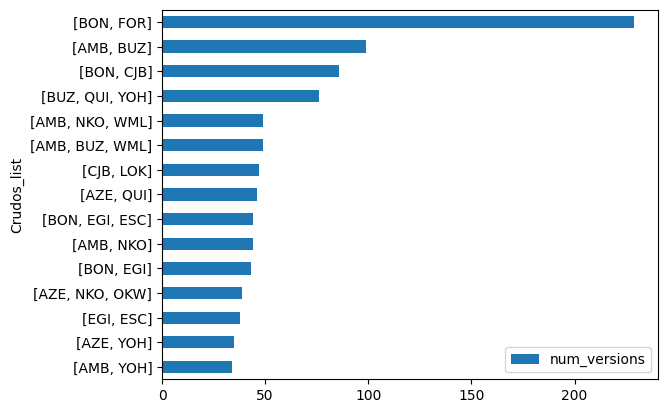

In [42]:
df_agrup.head(15).sort_values(by="num_versions").plot(x = "Crudos_list", y = "num_versions", kind="barh")
plt.show();

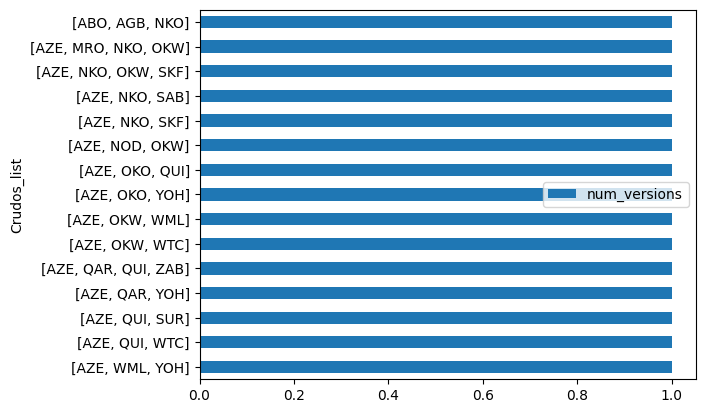

In [32]:
df_agrup.tail(15).sort_values(by="num_versions").plot(x = "Crudos_list", y = "num_versions", kind="barh")
plt.show();

In [45]:
cols_crudos

['ABO',
 'AGB',
 'AJE',
 'AKP',
 'AMB',
 'ATA',
 'AZE',
 'BAU',
 'BGA',
 'BOL',
 'BON',
 'BUZ',
 'CAE',
 'CEP',
 'CJB',
 'E44',
 'E46',
 'EGI',
 'ERH',
 'ESC',
 'ESH',
 'FOR',
 'GUL',
 'IRA',
 'JON',
 'LIV',
 'LOK',
 'MEL',
 'MRO',
 'NKO',
 'NOD',
 'OBE',
 'OKO',
 'OKR',
 'OKW',
 'OTA',
 'PEN',
 'QAR',
 'QUI',
 'SAB',
 'SAP',
 'SKF',
 'SUR',
 'TIE',
 'TIP',
 'TRO',
 'WML',
 'WTC',
 'WTL',
 'YOH',
 'ZAB']